# References
https://github.com/ultimate010/crnn 
{Combination of Convolutional and Recurrent Neural Network for Sentiment Analysis of Short Texts}
https://keras.io/examples/imdb_bidirectional_lstm/

# Folder Paths

In [1]:
colab = True
lahirurc1st = False

In [2]:
folder_path = "../../../"
if (colab):
    folder_path =  '/content/drive/My Drive/University/FYP/Sentiment Analysis/Implementation/'
elif (lahirurc1st):
    folder_path =  '/content/drive/My Drive/University/FYP/Sentiment Analysis/Implementation/'
lankadeepa_data_path = folder_path + 'corpus/new/preprocess_from_isuru/lankadeepa_tagged_comments.csv'
gossip_lanka_data_path = folder_path + 'corpus/new/preprocess_from_unicode_values/gossip_lanka_tagged_comments.csv'
embedding_size = 300
embedding_type = 'fasttext'
embedding_type1 = 'fasttext'
context = 5
word_embedding_path = folder_path + "word_embedding/"+embedding_type+"/source2_data_from_gosspiLanka_and_lankadeepa/"+str(embedding_size)+"/"+embedding_type1+"_"+str(embedding_size)+"_"+str(context)
word_embedding_keydvectors_path = folder_path + "word_embedding/"+embedding_type+"/source2_data_from_gosspiLanka_and_lankadeepa/"+str(embedding_size)+"/keyed_vectors/keyed.kv"
embedding_matrix_path = folder_path + 'Sentiment Analysis/CNN RNN/embedding_matrix/'+embedding_type+'_lankadeepa_gossiplanka_'+str(embedding_size)+'_'+str(context)

In [3]:
experiment_no = 111
model_name = "stacked_LSTM_3"
experiment_name = folder_path + "Sentiment Analysis/CNN RNN/experiments/" +str(experiment_no) + "_"+ model_name +"_"+embedding_type+"_"+str(embedding_size)+"_"+str(context)

model_save_path = folder_path + "Sentiment Analysis/CNN RNN/saved_models/"+str(experiment_no)+"_weights_best_"+model_name+"_"+embedding_type+"_"+str(experiment_no)+".hdf5"

# Imports Statements

In [4]:
from __future__ import print_function
if (colab):
  from google.colab import drive
  drive.mount('/content/drive')

import collections
import pickle
import re
import random
import sys
import os 
import time

import gensim
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.fasttext import FastText
from gensim.models import word2vec

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,precision_recall_fscore_support

import pandas as pd
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
from numpy import cumsum

import keras
from keras import backend as K
from keras.models import Sequential,Model,load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dropout, Activation, Flatten, \
    Embedding, Convolution1D, MaxPooling1D, AveragePooling1D, \
    Input, Dense, merge, Add,TimeDistributed, Bidirectional,SpatialDropout1D
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.regularizers import l2, l1_l2
from keras.constraints import maxnorm
from keras import callbacks
from keras.utils import generic_utils
from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


# Load Data

In [5]:
lankadeepa_data = pd.read_csv(lankadeepa_data_path)[:9059]
gossipLanka_data = pd.read_csv(gossip_lanka_data_path)
gossipLanka_data = gossipLanka_data.drop(columns=['Unnamed: 3'])

In [6]:
all_data = pd.concat([lankadeepa_data,gossipLanka_data])

In [7]:
all_data['label'].value_counts()

2    7665
4    3080
3    2403
5    1911
Name: label, dtype: int64

# preprocess Data

## Preprocessing 1

In [8]:
# edit this later 
def text_preprocessing(train_data,test_data):
  train_data_texts = train_data['comment']
  train_data_labels = train_data['label']
  test_data_texts = test_data['comment']
  test_data_labels = test_data['label']


  comment_texts = []
  comment_labels = []

  train_text = []
  test_text = []
  train_labels=[]
  test_labels=[]

  for label in train_data_labels:
    if label == "POSITIVE":
      train_labels.append(1)
    else:
      train_labels.append(0)
  comment_labels.append(train_labels)

  for label in test_data_labels:
    if label == "POSITIVE":
      test_labels.append(1)
    else:
      test_labels.append(0)
  comment_labels.append(test_labels)
  

  for comment in train_data_texts:
    lines = []
    try:
      words = comment.split()
      lines += words
    except:
      continue
    train_text.append(lines)
  comment_texts.append(train_text)

  for comment in test_data_texts:
    lines = []
    try:
      words = comment.split()
      lines += words
    except:
      continue
    test_text.append(lines)
  comment_texts.append(test_text)


  return comment_texts,comment_labels

# edit this later 
def text_preprocessing_1(data):
  comments = data['comment']
  labels = data['label']

  comments_splitted = []
  labels_encoded = []

  for label in labels:
    if label == "POSITIVE":
      labels_encoded.append(1)
    else:
      labels_encoded.append(0)

  for comment in comments:
    lines = []
    try:
      words = comment.split()
      lines += words
    except:
      continue
    comments_splitted.append(lines)
  return comments_splitted,labels_encoded


def text_preprocessing_2(data):
  comments = data['comment']
  labels = data['label']

  comments_splitted = []

  for comment in comments:
    lines = []
    try:
      words = comment.split()
      lines += words
    except:
      continue
    comments_splitted.append(lines)

  return comments_splitted,labels

## Preprocessing 2

In [9]:
comment_texts, comment_labels = text_preprocessing_2(all_data)

# prepare tokenizer

t = Tokenizer()
t.fit_on_texts(comment_texts)
vocab_size = len(t.word_index) + 1
print(vocab_size)

60316


In [10]:
encoded_docs = t.texts_to_sequences(comment_texts)

In [11]:
max_length = len(max(encoded_docs, key=len))
padded_docs = pad_sequences(encoded_docs, maxlen=max_length)

comment_labels = np.array(comment_labels)
padded_docs = np.array(padded_docs)

In [12]:
comment_labels = pd.get_dummies(comment_labels).values
print('Shape of label tensor:', comment_labels.shape)

Shape of label tensor: (15059, 4)


In [13]:

X_train, X_test, y_train, y_test = train_test_split(padded_docs, comment_labels, test_size=0.2, random_state=0)


# Word Embedding

## Generate Embedding Metrix

In [14]:
def generate_embedding_metrix():
  if (embedding_type == 'fasttext'):
    word_embedding_model = FastText.load(word_embedding_path)
  else:
    word_embedding_model = word2vec.Word2Vec.load(word_embedding_path)
    
  word_vectors = word_embedding_model.wv
  word_vectors.save(word_embedding_keydvectors_path)
  word_vectors = KeyedVectors.load(word_embedding_keydvectors_path, mmap='r')

  embeddings_index = dict()
  for word, vocab_obj in word_vectors.vocab.items():
    embeddings_index[word]=word_vectors[word]

  # create a weight matrix for words in training docs
  embedding_matrix = zeros((vocab_size, embedding_size))
  for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

  pickle.dump(embedding_matrix, open(embedding_matrix_path, 'wb'))
  return embedding_matrix

## Load Embedding Matrix

In [15]:
def load_word_embedding_atrix():
  f = open(embedding_matrix_path, 'rb')
  embedding_matrix= np.array(pickle.load(f))
  return embedding_matrix

# Models

## RNN(LSTM/GRU) model

In [16]:
def build_RNN_model():
    main_input = Input(shape=(maxlen, ), dtype='int32', name='main_input')
    embedding  = Embedding(max_features, embedding_dims,
                  weights=[embedding_matrix], input_length=maxlen,
                  name='embedding' ,trainable=False)(main_input)

    embedding = Dropout(0.50)(embedding)

    x = RNN(rnn_output_size)(embedding)

    x = Dense(hidden_dims, activation='relu', init='he_normal',
              W_constraint = maxnorm(3), b_constraint=maxnorm(3),
              name='mlp')(x)

    x = Dropout(0.10, name='drop')(x)

    output = Dense(4, init='he_normal',
                   activation='softmax', name='output')(x)

    model = Model(input=main_input, output=output)

    print(model.summary())
    return model

def build_stacked_RNN_model():
    main_input = Input(shape=(maxlen, ), dtype='int32', name='main_input')
    embedding  = Embedding(max_features, embedding_dims,
                  weights=[embedding_matrix], input_length=maxlen,
                  name='embedding' ,trainable=False)(main_input)

    embedding = Dropout(0.50)(embedding)

    x = RNN(rnn_output_size,return_sequences=True)(embedding)
    x = RNN(rnn_output_size)(x)

    x = Dense(hidden_dims, activation='relu', init='he_normal',
              W_constraint = maxnorm(3), b_constraint=maxnorm(3),
              name='mlp')(x)

    x = Dropout(0.10, name='drop')(x)

    output = Dense(4, init='he_normal',
                   activation='softmax', name='output')(x)

    model = Model(input=main_input, output=output)

    print(model.summary())
    return model

def build_stacked_RNN_model_3():
    main_input = Input(shape=(maxlen, ), dtype='int32', name='main_input')
    embedding  = Embedding(max_features, embedding_dims,
                  weights=[embedding_matrix], input_length=maxlen,
                  name='embedding' ,trainable=False)(main_input)

    embedding = Dropout(0.50)(embedding)

    x = RNN(rnn_output_size,return_sequences=True)(embedding)
    x = RNN(rnn_output_size,return_sequences=True)(x)
    x = RNN(rnn_output_size)(x)

    x = Dense(hidden_dims, activation='relu', init='he_normal',
              W_constraint = maxnorm(3), b_constraint=maxnorm(3),
              name='mlp')(x)

    x = Dropout(0.10, name='drop')(x)

    output = Dense(4, init='he_normal',
                   activation='softmax', name='output')(x)

    model = Model(input=main_input, output=output)

    print(model.summary())
    return model

## CNN+RNN(LSTM /GRU) model 

In [17]:
def build_CNN_RNN_model():
    main_input = Input(shape=(maxlen, ), dtype='int32', name='main_input')
    embedding  = Embedding(max_features, embedding_dims,
                  weights=[embedding_matrix], input_length=maxlen,
                  name='embedding' ,trainable=False)(main_input)

    embedding = Dropout(0.50)(embedding)

    conv4 = Convolution1D(nb_filter=nb_filter,
                          filter_length=4,
                          border_mode='valid',
                          activation='relu',
                          subsample_length=1,
                          name='conv4')(embedding)
    maxConv4 = MaxPooling1D(pool_length=2,
                             name='maxConv4')(conv4)

    conv5 = Convolution1D(nb_filter=nb_filter,
                          filter_length=5,
                          border_mode='valid',
                          activation='relu',
                          subsample_length=1,
                          name='conv5')(embedding)
    maxConv5 = MaxPooling1D(pool_length=2,
                            name='maxConv5')(conv5)

    x = keras.layers.Concatenate(axis=1)([maxConv4, maxConv5])

    x = Dropout(0.15)(x)

    x = RNN(rnn_output_size)(x)


    x = Dense(hidden_dims, activation='relu', init='he_normal',
              W_constraint = maxnorm(3), b_constraint=maxnorm(3),
              name='mlp')(x)

    x = Dropout(0.10, name='drop')(x)

    output = Dense(4, init='he_normal',
                   activation='softmax', name='output')(x)

    model = Model(input=main_input, output=output)

    return model

## BiLSTM 

In [18]:
# final model
def build_BiLSTM_1_2():
  input = Input(shape=(maxlen,))
  embedding = Embedding(max_features,embedding_dims,weights=[embedding_matrix],input_length=maxlen)(input)

  model =  Bidirectional (LSTM (300,return_sequences=True,dropout=drop_out_value,kernel_regularizer=l2(0.01)),merge_mode='concat')(embedding)
  model = TimeDistributed(Dense(300,activation='relu'))(model)
  model = Flatten()(model)
  model = Dense(300,activation='relu')(model) # extra dense layer
  output = Dense(4,activation='softmax')(model)
  model = Model(input,output)
  
  return model

def build_BiLSTM_plain():
  input = Input(shape=(maxlen,))
  embedding = Embedding(max_features,embedding_dims,weights=[embedding_matrix],input_length=maxlen)(input)

  model =  Bidirectional (LSTM (300,return_sequences=True),merge_mode='concat')(embedding)
  model = TimeDistributed(Dense(300,activation='relu'))(model)
  model = Flatten()(model)
  model = Dense(300,activation='relu')(model) # extra dense layer
  output = Dense(4,activation='softmax')(model)
  model = Model(input,output)
  
  return model

### Stacked_BiLSTM

In [19]:
# final model
def build_Stacked_BiLSTM_2():
  input = Input(shape=(maxlen,))
  embedding = Embedding(max_features,embedding_dims,weights=[embedding_matrix],input_length=maxlen)(input)

  model =  Bidirectional (LSTM (300,return_sequences=True,dropout=drop_out_value,kernel_regularizer=l2(0.01)),merge_mode='concat')(embedding)
  model =  Bidirectional (LSTM (300,return_sequences=True),merge_mode='concat')(model)
  model = TimeDistributed(Dense(300,activation='relu'))(model)
  model = Flatten()(model)
  model = Dense(300,activation='relu')(model)
  output = Dense(4,activation='softmax')(model)
  model = Model(input,output)
  
  return model

# final model
def build_Stacked_BiLSTM_3():
  input = Input(shape=(maxlen,))
  embedding = Embedding(max_features,embedding_dims,weights=[embedding_matrix],input_length=maxlen)(input)

  model =  Bidirectional (LSTM (300,return_sequences=True,dropout=drop_out_value,kernel_regularizer=l2(0.01)),merge_mode='concat')(embedding)
  model =  Bidirectional (LSTM (300,return_sequences=True),merge_mode='concat')(model)
  model =  Bidirectional (LSTM (300,return_sequences=True),merge_mode='concat')(model)
  model = TimeDistributed(Dense(300,activation='relu'))(model)
  model = Flatten()(model)
  model = Dense(300,activation='relu')(model)
  output = Dense(4,activation='softmax')(model)
  model = Model(input,output)
  
  return model

## CNN+BiLSTM

In [20]:
def build_CNN_BiLSTM():
  # main model
  input = Input(shape=(maxlen,))
  embedding = Embedding(max_features,300,weights=[embedding_matrix],input_length=maxlen)(input)

  conv4 = Convolution1D(nb_filter=nb_filter,
                          filter_length=4,
                          border_mode='valid',
                          activation='relu',
                          subsample_length=1,
                          name='conv4')(embedding)
  maxConv4 = MaxPooling1D(pool_length=2,
                             name='maxConv4')(conv4)

  conv5 = Convolution1D(nb_filter=nb_filter,
                          filter_length=5,
                          border_mode='valid',
                          activation='relu',
                          subsample_length=1,
                          name='conv5')(embedding)
  maxConv5 = MaxPooling1D(pool_length=2,
                            name='maxConv5')(conv5)


  x = keras.layers.Concatenate(axis=1)([maxConv4, maxConv5])

  x = Dropout(0.15)(x)

  model =  Bidirectional (LSTM (300,return_sequences=True,dropout=0.8),merge_mode='concat')(x)
  model = TimeDistributed(Dense(300,activation='relu'))(model)
  model = Flatten()(model)
  model = Dense(300,activation='relu')(model)
  output = Dense(4,activation='softmax')(model)
  model = Model(input,output)
  
  return model


# Train and Evaluate Model

## Custom F1 Implementation

In [21]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Train and Validate model

In [22]:
def Train_Model_1(model,X_train, X_test, y_train, y_test):

  print('Training and Testing...')
  test_accs = []
  first_run = True


  acc=[]
  val_acc=[]
  loss=[]
  val_loss=[]
  best_val_acc = 0
  best_test_acc = 0
  for j in range(nb_epoch):
      a = time.time()
      his = model.fit(X_train, y_train,
                      batch_size=batch_size,
                      validation_data=[X_test, y_test],
                      shuffle=True,
                      epochs=1, verbose=verbosity)
      acc+=his.history['accuracy']
      val_acc+=his.history['val_accuracy']
      loss+=his.history['loss']
      val_loss+=his.history['val_loss']
      # print('Epoch %d/%d\t%s' % (j + 1, nb_epoch, str(his.history)))
      if his.history['val_accuracy'][0] >= best_val_acc:
          score, test_acc = model.evaluate(X_test, y_test,
                                      batch_size=batch_size,
                                      verbose=2)
          best_val_acc = his.history['val_accuracy'][0]
          best_test_acc = test_acc
          print('Got best epoch  best val acc is %f test acc is %f' %
                (best_val_acc, best_test_acc))
          if len(test_accs) > 0:
              print('Current avg test acc:', str(np.mean(test_accs)))
      b = time.time()
      cost = b - a
      left = (nb_epoch - j - 1)
      print('One round cost %ds, %d round %ds %dmin left' % (cost, left,
                                                            cost * left,
                                                            cost * left / 60.0))
      test_accs.append(best_test_acc)

  print('Avg test acc:', str(np.mean(test_accs)))
  return model

In [23]:
def Train_Model_2(model,X_train, y_train):

  print('Training and Testing...')
  
  es = EarlyStopping(monitor='val_f1', mode='max', verbose=1, patience=3)
  checkpoint = ModelCheckpoint(model_save_path, monitor='val_f1', verbose=1, save_best_only=True, mode='max')
  callbacks_list = [checkpoint,es]

  his = model.fit(X_train, y_train, validation_split=0.2, epochs=nb_epoch, batch_size=batch_size, callbacks=callbacks_list, verbose=1)
  return model,his

Compile Model

In [24]:
def compile_model(model , model_type):
  if model_type ==  1: # CNN RNN GRU LSTM 
    model.compile(loss={'output':'categorical_crossentropy'},
                  optimizer=Adadelta(lr=0.95, epsilon=1e-06),
                  metrics=["accuracy",f1])
  elif model_type == 2 :# CNN BiLSTM 
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy',f1])
  return model

# Cross Validation

In [25]:
def Do_Cross_Validation(model,X,y):

  # Define per-fold score containers
  acc_per_fold = []
  loss_per_fold = []

  kfold = KFold(n_splits=folds, shuffle=True)

  fold_no = 1
  inputs = X
  targets = y
  for train, test in kfold.split(inputs, targets):
    model = model

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    his = model.fit(inputs[train], targets[train],
                  batch_size=batch_size,
                  shuffle=True,
                  epochs=nb_epoch, 
                  verbose=verbosity,
                  validation_split=validation_split)
    
    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

  # == Provide average scores ==
  print('------------------------------------------------------------------------')
  print('Score per fold')
  for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  print('------------------------------------------------------------------------')
  print('Average scores for all folds:')
  print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
  print(f'> Loss: {np.mean(loss_per_fold)}')
  print('------------------------------------------------------------------------')

# Plot Graphs

In [26]:
def Plot_graphs(metric,val_metric,metric_name):

  epochs=range(len(metric)) # Get number of epochs

  if metric_name == "accuracy":
    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot(epochs, metric, 'r')
    plt.plot(epochs, val_metric, 'b')
    plt.title('Training and validation accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Accuracy", "Validation Accuracy"])

    plt.figure()

  elif metric_name == "loss" :
    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot(epochs, metric, 'r')
    plt.plot(epochs, val_metric, 'b')
    plt.title('Training and validation loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Loss", "Validation Loss"])

    plt.figure()

  elif metric_name == "f1" :
    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot(epochs, metric, 'r')
    plt.plot(epochs, val_metric, 'b')
    plt.title('Training and validation F1')
    plt.xlabel("Epochs")
    plt.ylabel("F1")
    plt.legend(["F1", "Validation F1"])

    plt.figure()


  # Expected Output
  # A chart where the validation loss does not increase sharply!

# Main

## Set Parameters

In [27]:
# embedding_matrix = generate_embedding_metrix()
embedding_matrix = load_word_embedding_atrix()

In [28]:
batch_size = 32 # 64, 128
nb_filter = 200
filter_length = 4 # test with 2,3,4,5
hidden_dims = nb_filter * 2
nb_epoch = 15
RNN = LSTM
rnn_output_size = embedding_size 
folds = 3
maxlen = 210 #test with other values
max_features = embedding_matrix.shape[0] #vocab_size
embedding_dims = embedding_size
drop_out_value = 0.5 #0.8 #0.3
verbosity = 1
validation_split = 0.2

In [29]:
model = build_stacked_RNN_model_3()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 210)               0         
_________________________________________________________________
embedding (Embedding)        (None, 210, 300)          18094800  
_________________________________________________________________
dropout_1 (Dropout)          (None, 210, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 210, 300)          721200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 210, 300)          721200    
_________________________________________________________________
lstm_3 (LSTM)                (None, 300)               721200    
_________________________________________________________________
mlp (Dense)                  (None, 400)               1204

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, activation="relu", name="mlp", kernel_initializer="he_normal", kernel_constraint=<keras.con..., bias_constraint=<keras.con...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="softmax", name="output", kernel_initializer="he_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ma..., outputs=Tensor("ou...)`


Training and Testing...
Train on 9637 samples, validate on 2410 samples
Epoch 1/15
9637/9637 [==============================] - 327s 34ms/step - loss: 1.0454 - accuracy: 0.6007 - f1: 0.5356 - val_loss: 0.9735 - val_accuracy: 0.6087 - val_f1: 0.6068

Epoch 00001: val_f1 improved from -inf to 0.60680, saving model to /content/drive/My Drive/University/FYP/Sentiment Analysis/Implementation/Sentiment Analysis/CNN RNN/saved_models/111_weights_best_stacked_LSTM_3_fasttext_111.hdf5
Epoch 2/15
9637/9637 [==============================] - 326s 34ms/step - loss: 0.9585 - accuracy: 0.6221 - f1: 0.5924 - val_loss: 0.9094 - val_accuracy: 0.6228 - val_f1: 0.5950

Epoch 00002: val_f1 did not improve from 0.60680
Epoch 3/15
9637/9637 [==============================] - 324s 34ms/step - loss: 0.9304 - accuracy: 0.6337 - f1: 0.6003 - val_loss: 0.8905 - val_accuracy: 0.6469 - val_f1: 0.6072

Epoch 00003: val_f1 improved from 0.60680 to 0.60721, saving model to /content/drive/My Drive/University/FYP/Sentim

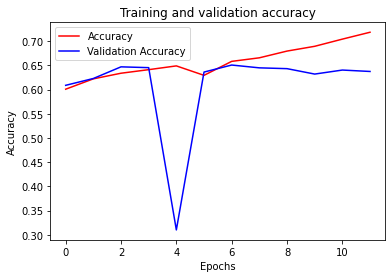

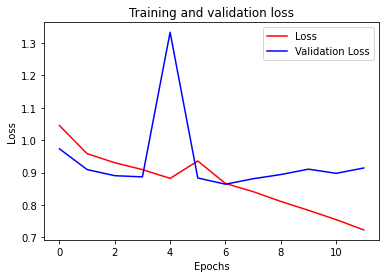

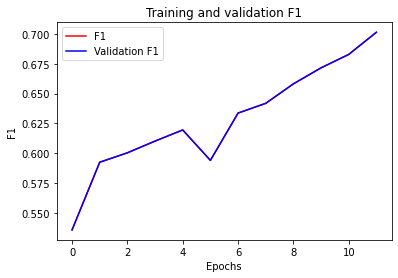

<Figure size 432x288 with 0 Axes>

In [72]:
trained_model = compile_model(model, 2)
# trained_model = Train_Model_1(model,X_train, X_test, y_train, y_test)
trained_model, his = Train_Model_2(trained_model,X_train, y_train)

accuracy = his.history['accuracy']
val_accuracy = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
f1 = his.history['f1']
val_f1 = his.history['f1']

Plot_graphs(accuracy,val_accuracy, "accuracy")
Plot_graphs(loss,val_loss, "loss")
Plot_graphs(f1,val_f1, "f1")

In [73]:
# Do_Cross_Validation(model,padded_docs,comment_labels)

# Restart runtime and import libraries

In [30]:
# # os.kill(os.getpid(), 9)

# exit()

In [31]:
# from keras.models import Sequential,Model,load_model
# import pandas as pd
# import numpy as np
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,precision_recall_fscore_support

# experiment_no = 100
# model_name = "RNN"
# experiment_name = folder_path + "Sentiment Analysis/CNN RNN/experiments/" + model_name +str(experiment_no)+"_"+embedding_type+"_"+str(embedding_size)+"_"+str(context)

# model_save_path = folder_path + "Sentiment Analysis/CNN RNN/saved_models/weights_best_"+model_name+"_"+embedding_type+"_"+str(embedding_size)+"_"+str(experiment_no)+".hdf5"

# Load Weights to Model

In [32]:
loaded_model  = load_model(model_save_path,custom_objects={"f1": f1}, compile=True)

## check loaded model

In [33]:
# _, train_acc,train_f1 = loaded_model.evaluate(X_train, y_train, verbose=1)
# _, test_acc,test_f1= loaded_model.evaluate(X_test, y_test, verbose=1)
# print('Train_acc: %.3f, Test_acc: %.3f, Train_f1: %.3f,  Test_f1: %.3f' % (train_acc, test_acc,train_f1,test_f1))

## Get Predictions

In [34]:
predictions = loaded_model.predict(X_test, batch_size=batch_size, verbose=0)

In [35]:
labels = np.argmax(y_test, axis=1)
predictions = np.argmax(predictions, axis=1)

In [36]:
report = classification_report(labels, predictions, digits=4,output_dict=True)
report_print = classification_report(labels, predictions, digits=4)
print(report_print)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv(experiment_name+".csv")

              precision    recall  f1-score   support

           0     0.6373    0.9263    0.7551      1533
           1     0.5127    0.2000    0.2877       505
           2     0.7761    0.6051    0.6800       590
           3     0.4094    0.1354    0.2035       384

    accuracy                         0.6408      3012
   macro avg     0.5839    0.4667    0.4816      3012
weighted avg     0.6146    0.6408    0.5917      3012

